In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# getting raw data
trial_data = []
debrief_data = []

for line in open('trials_data_p_all.json', 'r'):
    trial_data.append(json.loads(line))
for line in open('debriefs_data_p_all.json', 'r'):
    debrief_data.append(json.loads(line))

In [5]:
print(len(trial_data))

224


In [6]:
# transforming data into one dictionary with room as key and worker token_id as nested keys for their data
trial_data_room = {}
for trial in trial_data:
    id = trial["token_id"]
    room = trial["room"]
    if room not in trial_data_room.keys():
        trial_data_room[room] = {}
    if id not in trial_data_room[room].keys():
        trial_data_room[room][id] = []
    if trial not in trial_data_room[room][id]:
        trial_data_room[room][id].append(trial)

In [8]:
# checking how many workers completed the task together and computing their bonus. 
# appends details to a bash script that can be executed through aws from terminal  
boni = {}
rooms = list(trial_data_room.keys())
batch_results = pd.read_csv('batch_results_p_all.csv')
completion_pay = 3.50
# reduced data for participants that completed the task 
trial_data_completed = {}

# create bash script headline
with open ('bonus_results_p_all.sh', 'w') as rsh:
    bash = '''"#! /bin/bash"'''
    rsh.write(bash)
    
for room in rooms:
    if len(trial_data_room[room]) == 2:
        boni[room] = {}
        trial_data_completed[room] = {}
        tokens = list(trial_data_room[room].keys())
        for token in tokens:
            if len(trial_data_room[room][token]) == 5:
     
                boni[room][token] = 0
                trial_data_completed[room][token] = trial_data_room[room]
                for trial in range(0, len(trial_data_room[room][token])):
                    boni[room][token] += (sum(trial_data_room[room][token][trial]['posterior'][:4]) * 5 + (4 - sum(trial_data_room[room][token][trial]['posterior'][4:])))  / 100
                boni[room][token] = round(boni[room][token],2)
            
#                 location = batch_results[batch_results['Answer.surveycode']==token].index.item()
#                 print(token)
                
#                 worker_id = batch_results.loc[location, 'WorkerId']
#                 assignment_id = batch_results.loc[location, 'AssignmentId']
#                 bonus_amount = str(boni[room][token])
#                 total_bonus = str(boni[room][token] + completion_pay)
        
#                 with open ('bonus_results_p_all.sh', 'a') as rsh:
#                     bash ="\naws mturk send-bonus --worker-id " + worker_id + " --bonus-amount " + total_bonus + " --assignment-id " + assignment_id + " --reason  '$3.50 completion pay + " + "$" + bonus_amount + " bonus for your performance during the Challenging Science Game hit'"
#                     rsh.write(bash)
          

cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat


In [9]:
# creating a new data frame more convenient for analysis 
df_zendo = pd.DataFrame({"room": [], 
                         "token_id": [], 
                         "rule_name": [], 
                         "rule_description": [], 
                         "prior": [], 
                         "posterior": [], 
                         "prior_accuracy": [], 
                         "posterior_accuracy": [], 
                         "prior_feedback": [], 
                         "posterior_feedback": [],
                         "data": []})


# rule details 
rules = ["Rule1", "Rule2", "Rule3", "Rule4", "Rule5", "Rule6", "Rule7", "Rule8", "Rule9", "Rule10"]
rule_names = ['Zeta' ,'Phi' ,'Upsilon' ,'Iota' ,'Kappa' ,'Omega' ,'Mu' ,'Nu' ,'Xi', 'Psi']
rule_descriptions = ['there is a red', 
                     'they are all the same size', 
                     'none are upright', 
                     'one is blue', 
                     'at least one is blue AND small', 
                     'all are blue OR small',
                     'a red is bigger than all nonreds', 
                     'contact', 
                     'blue to red contact', 
                     'stacked']

ground_truth = [True,True,True,True,False,False,False,False]

for room in list(trial_data_completed.keys()):
    for token in list(trial_data_completed[room]):
        if len(trial_data_completed[room][token][token]) == 5:
            trial_index = 0
            for trial in trial_data_completed[room][token][token]:
                if list(trial_data_completed[room]).index(token) == 0:
                    partner_token = list(trial_data_completed[room])[1]
                    partner_trial = trial_data_completed[room][partner_token][partner_token][trial_index]
                else:
                    partner_token = list(trial_data_completed[room])[0]
                    partner_trial = trial_data_completed[room][partner_token][partner_token][trial_index]
                
                rule_name = trial['rule']
                rule_description = rule_descriptions[rule_names.index(rule_name)]
                prior = trial['prior']
                prior_partner = partner_trial['prior']
                posterior = trial['posterior']
                posterior_partner = partner_trial['posterior']
                prior_accuracy = (sum(prior[:4]) + (4 - sum(prior[4:]))) / len(prior)
                prior_accuracy_partner = (sum(partner_trial['prior'][:4]) + (4 - sum(partner_trial['prior'][4:]))) / len(partner_trial['prior'])
                posterior_accuracy = (sum(posterior[:4]) + (4 - sum(posterior[4:]))) / len(posterior)
                posterior_accuracy_partner = (sum(partner_trial['posterior'][:4]) + (4 - sum(partner_trial['posterior'][4:]))) / len(partner_trial['posterior'])
                prior_feedback = trial['ph4_answer']
                posterior_feedback = trial['ph5_answer']
                
                # getting stats on how generalisations of partner and subjects compare 
                prior_match = [a and b or not a and not b for a, b in zip(prior, partner_trial['prior'])]
                posterior_match = [a and b or not a and not b for a, b in zip(posterior, partner_trial['posterior'])]
                prior_match_perc = sum(prior_match) / len(prior_match)
                post_match_perc = sum(posterior_match) / len(posterior_match)
                prior_match_acc = sum([a and b and c or not a and not b and not c for a,b,c in zip(prior, partner_trial['prior'], ground_truth)]) / len(prior)
                post_match_acc = sum([a and b and c or not a and not b and not c for a,b,c in zip(posterior, partner_trial['posterior'], ground_truth)]) / len(prior)
                
                prior_alone_acc = sum([a and not b and c or not a and b and not c for a,b,c in zip(prior, partner_trial['prior'], ground_truth)]) / len(prior)
                post_alone_acc = sum([a and not b and c or not a and b and not c for a,b,c in zip(posterior, partner_trial['posterior'], ground_truth)]) / len(prior)
                prior_alone = [a and not b or not a and b for a,b in zip(prior, partner_trial['prior'])]
                posterior_alone = [a and not b or not a and b for a,b in zip(posterior, partner_trial['posterior'])]
                prior_alone_perc = sum(prior_alone) / len(prior_alone)
                post_alone_perc = sum(posterior_alone) / len(posterior_alone)
            
                # now checking how better player influenced the other player \n",
                if prior_accuracy >= prior_accuracy_partner:
                    delta_high_acc = posterior_accuracy - prior_accuracy
                    delta_low_acc = posterior_accuracy_partner - prior_accuracy_partner
                elif prior_accuracy < prior_accuracy_partner:
                    delta_high_acc = posterior_accuracy_partner - prior_accuracy_partner
                    delta_low_acc = posterior_accuracy - prior_accuracy

                prior_select_alone = [a and not b for a, b in zip(prior, partner_trial['prior'])]
                posterior_select_alone = [a and not b for a, b in zip(posterior, partner_trial['posterior'])]
                prior_select_other = [not a and b for a, b in zip(prior, partner_trial['prior'])]
                posterior_select_other = [not a and b for a, b in zip(posterior, partner_trial['posterior'])]
                accuracy_diff_prior = prior_accuracy - prior_accuracy_partner
                accuracy_diff_post = posterior_accuracy - posterior_accuracy_partner
                accuracy_change = prior_accuracy - posterior_accuracy
                accuracy_change_partner = prior_accuracy_partner - posterior_accuracy_partner
                data =  trial['data']
                
                
                df_zendo = df_zendo.append(pd.DataFrame({"room": [room], 
                                                         "token_id": [token], 
                                                         "rule_name": [rule_name], 
                                                         "rule_description": [rule_description], 
                                                         "prior": [prior], 
                                                         "prior_partner": [prior_partner],
                                                         "prior_match": [prior_match],
                                                         "prior_select_alone": [prior_select_alone],
                                                         "prior_select_other": [prior_select_other],
                                                         "posterior": [posterior], 
                                                         "posterior_partner": [posterior_partner],
                                                         "posterior_match": [posterior_match],
                                                         "posterior_select_alone": [posterior_select_alone],
                                                         "posterior_select_other": [posterior_select_other],
                                                         "prior_accuracy": [prior_accuracy], 
                                                         "posterior_accuracy": [posterior_accuracy], 
                                                         "prior_feedback": [prior_feedback], 
                                                         "posterior_feedback": [posterior_feedback],
                                                         "accuracy_diff_prior": [accuracy_diff_prior],
                                                         "accuracy_diff_post": [accuracy_diff_post],
                                                         "accuracy_change": [accuracy_change],
                                                         "accuracy_change_partner": [accuracy_change_partner],
                                                         "prior_match_perc": [prior_match_perc],
                                                         "posterior_match_perc": [post_match_perc],
                                                         "prior_match_acc": [prior_match_acc],
                                                         "posterior_match_acc": [post_match_acc],
                                                         "prior_alone_acc": [prior_alone_acc],
                                                         "posterior_alone_acc": [post_alone_acc],
                                                         "delta_low_acc": [delta_low_acc],
                                                         "delta_high_acc": [delta_high_acc],
                                                         "prior_alone_perc": [prior_alone_perc],
                                                         "posterior_alone_perc": [post_alone_perc],
                                                         
                                                         "data": [data]}), ignore_index=True, sort=False)
                trial_index += 1


                

df_zendo.to_csv('main_data_formatted.csv')
print(df_zendo)

           room              token_id rule_name  \
0         TDvs5  WjsXkIQV1LXVlJmcAAAJ     Omega   
1         TDvs5  WjsXkIQV1LXVlJmcAAAJ   Upsilon   
2         TDvs5  WjsXkIQV1LXVlJmcAAAJ     Kappa   
3         TDvs5  WjsXkIQV1LXVlJmcAAAJ      Iota   
4         TDvs5  WjsXkIQV1LXVlJmcAAAJ        Xi   
5         TDvs5  piHJRkGAQiNDVM_pAAAL     Omega   
6         TDvs5  piHJRkGAQiNDVM_pAAAL   Upsilon   
7         TDvs5  piHJRkGAQiNDVM_pAAAL     Kappa   
8         TDvs5  piHJRkGAQiNDVM_pAAAL      Iota   
9         TDvs5  piHJRkGAQiNDVM_pAAAL        Xi   
10        vrJh5  zZ5CYdb0UfG8F3vRAAAS     Omega   
11        vrJh5  zZ5CYdb0UfG8F3vRAAAS      Zeta   
12        vrJh5  zZ5CYdb0UfG8F3vRAAAS        Nu   
13        vrJh5  zZ5CYdb0UfG8F3vRAAAS     Kappa   
14        vrJh5  zZ5CYdb0UfG8F3vRAAAS        Mu   
15        vrJh5  Sx5A2_s1FPDoUsTLAAAT     Omega   
16        vrJh5  Sx5A2_s1FPDoUsTLAAAT      Zeta   
17        vrJh5  Sx5A2_s1FPDoUsTLAAAT        Nu   
18        vrJh5  Sx5A2_s1FPDoUs

In [12]:
# plotting prior and posterior accuracy
token_ids = df_zendo['token_id']
token_ids = list(dict.fromkeys(token_ids))



fig, ax = plt.subplots(40,1,figsize=(100,160))
x = np.arange(5)
width = 0.05

  

prior_acc = []
feedback_1 = []
post_acc = []
feedback_2 = []
names = []
prior_match_perc = []
posterior_match_perc = []

prior_alone_perc = []
posterior_alone_perc = []

prior_match_acc = []
posterior_match_acc = []
prior_alone_acc = []
posterior_alone_acc = []

d_low_acc = []
d_high_acc = []
plt.rcParams.update({'font.size': 25})




for subj in range(0, 40):  
    names.append(df_zendo['rule_description'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    prior_acc.append(df_zendo['prior_accuracy'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    feedback_1.append(df_zendo['prior_feedback'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    feedback_2.append(df_zendo['posterior_feedback'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    post_acc.append(df_zendo['posterior_accuracy'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    prior_alone_perc.append(df_zendo['prior_alone_perc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    posterior_alone_perc.append(df_zendo['posterior_alone_perc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    prior_match_perc.append(df_zendo['prior_match_perc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    posterior_match_perc.append(df_zendo['posterior_match_perc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    prior_match_acc.append(df_zendo['prior_match_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    posterior_match_acc.append(df_zendo['posterior_match_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    prior_alone_acc.append(df_zendo['prior_alone_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    posterior_alone_acc.append(df_zendo['posterior_alone_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    
    d_low_acc.append(df_zendo['delta_low_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    d_high_acc.append(df_zendo['delta_high_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    
    
    prior_a_rect = ax[subj].bar(x - 0.275, prior_acc[subj], width, label="prior_accuracy")
    post_a_rect = ax[subj].bar(x - 0.225, post_acc[subj], width, label="posterior_accuracy")
    prior_ap_rect = ax[subj].bar(x - 0.175, prior_alone_perc[subj], width, label="prior_alone_perc")
    post_ap_rect = ax[subj].bar(x - 0.125, posterior_alone_perc[subj], width, label="post_alone_perc")
    prior_mp_rect = ax[subj].bar(x - 0.075, prior_match_perc[subj], width, label="prior_union_perc")
    post_mp_rect = ax[subj].bar(x - 0.025, posterior_match_perc[subj], width, label="post_union_perc")
    prior_ap_a_rect = ax[subj].bar(x + 0.025, prior_alone_acc[subj], width, label="prior_alone_accuracy")
    post_ap_a_rect = ax[subj].bar(x + 0.075, posterior_alone_acc[subj], width, label="post_alone_accuracy")
    prior_mp_a_rect = ax[subj].bar(x + 0.125, prior_match_acc[subj], width, label="prior_union_accuracy")
    post_mp_a_rect = ax[subj].bar(x + 0.175, posterior_match_acc[subj], width, label="posterior_union_accuracy")
    d_low_a_rect = ax[subj].bar(x + 0.225, d_low_acc[subj], width, label="d_low_accuracy")
    d_high_a_rect = ax[subj].bar(x + 0.275, d_high_acc[subj], width, label="d_high_accuracy")

    
    
    
    ax[subj].set_ylabel('percentage', size=30, color="red")
    ax[subj].set_title("id: " + token_ids[subj] + ", room: " + df_zendo['room'].loc[df_zendo['token_id'] == token_ids[subj]].tolist()[0], color="red", size=50)
    ax[subj].set_xticks(x)
    ax[subj].set_xticklabels(names[subj])
    ax[subj].tick_params(axis='x', colors='red')
    ax[subj].tick_params(axis='y', colors='red')
    ax[subj].legend()
    fig.tight_layout()
    

plt.show()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


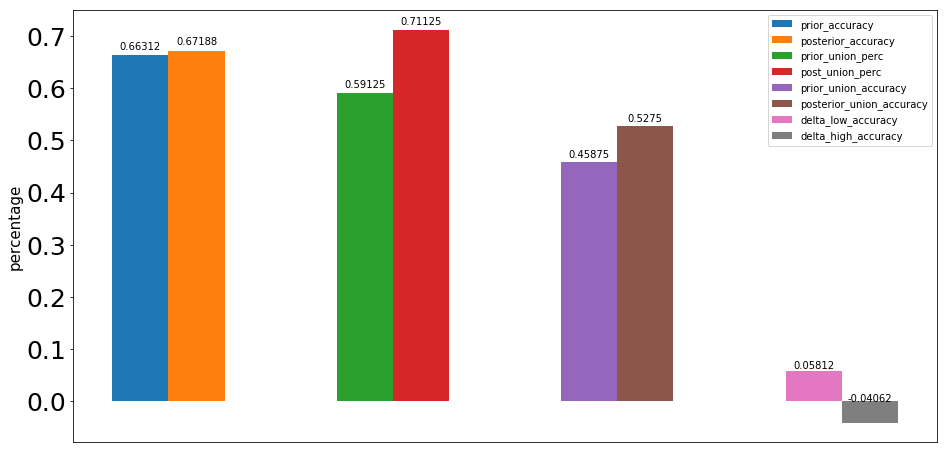

In [13]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
x = np.arange(1)
plt.rcParams.update({'font.size': 10})

width = 0.05
prior_a_rect = ax.bar(x - 0.225, np.mean(prior_acc), width, label="prior_accuracy")
post_a_rect = ax.bar(x - 0.175, np.mean(post_acc), width, label="posterior_accuracy")

# prior_ap_rect = ax.bar(x - 0.125, np.mean(prior_alone_perc), width, label="prior_alone_perc")
# post_ap_rect = ax.bar(x - 0.075, np.mean(posterior_alone_perc), width, label="post_alone_perc")
                      
prior_mp_rect = ax.bar(x - 0.025, np.mean(prior_match_perc), width, label="prior_union_perc")
post_mp_rect = ax.bar(x + 0.025, np.mean(posterior_match_perc), width, label="post_union_perc")

# prior_ap_a_rect = ax.bar(x + 0.075, np.mean(prior_alone_acc), width, label="prior_alone_accuracy")
# post_ap_a_rect = ax.bar(x + 0.125, np.mean(posterior_alone_acc), width, label="post_alone_accuracy")

prior_mp_a_rect = ax.bar(x + 0.175, np.mean(prior_match_acc), width, label="prior_union_accuracy")
post_mp_a_rect = ax.bar(x + 0.225, np.mean(posterior_match_acc), width, label="posterior_union_accuracy")

d_low_a_rect = ax.bar(x + 0.375, np.mean(d_low_acc), width, label="delta_low_accuracy")
d_high_a_rect = ax.bar(x + 0.425, np.mean(d_high_acc), width, label="delta_high_accuracy")

acc_values = [np.mean(prior_acc), 
              np.mean(post_acc),
              np.mean(prior_match_perc),
              np.mean(posterior_match_perc),
              np.mean(prior_match_acc),
              np.mean(posterior_match_acc),
              np.mean(d_low_acc),
              np.mean(d_high_acc)]
                       
rects = [prior_a_rect,
         post_a_rect,
         prior_mp_rect,
         post_mp_rect,
         prior_mp_a_rect,
         post_mp_a_rect,
         d_low_a_rect,
         d_high_a_rect]

def autolabel(rects, ind, sign = 1, mult=1.01):
   
    i = 0
    for rect in rects:
        height = rects[i].get_height()
        ax.text(rects[i].get_x() + rect.get_width()/2., mult*sign*height,
                round(acc_values[ind],5),
                ha='center', va='bottom')
        i+= 1

autolabel(rects[0],0)
autolabel(rects[1],1)
autolabel(rects[2],2)
autolabel(rects[3],3)
autolabel(rects[4],4)
autolabel(rects[5],5)
autolabel(rects[6],6)
autolabel(rects[7],7, sign = -1, mult=-0.105)


ax.set_ylabel('percentage', size=15, color="black")
plt.tick_params(
    axis='x',          # changes apply to the x-axis\n",
    which='both',      # both major and minor ticks are affected\n",
    bottom=False,      # ticks along the bottom edge are off\n",
    top=False,         # ticks along the top edge are off\n",
    labelbottom=False)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.legend()
fig.tight_layout()


In [35]:
cat = {"V1":3,"V2":[1,5],"V3":[2,4],"V4":[3,0],"V5":2,"V6":[5,1]}

In [18]:
from scipy import stats 
stats.ttest_ind(prior_match_acc, post_match_acc)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)

Ttest_indResult(statistic=array([nan, nan, nan, nan, nan]), pvalue=array([nan, nan, nan, nan, nan]))

In [21]:
print(np.mean(prior_match_acc))

0.45875


In [71]:
f = [True,True]
l = []
[l.append(1) for i in f if i is True]
print(l)

[1, 1]


In [72]:
print(isinstance(False, str))

False


In [23]:
import math
math.e**(.5/float('inf')) / (math.e**(.5/float('inf')) + math.e**((1-.5)/float('inf')))

0.5

In [27]:
math.e**(.5/100000) / (math.e**(.5/100000) + math.e**((1-.5)/100000))

0.5

In [26]:
df_zendo['rule_name'].value_counts()[0]
print(df_zendo['rule_name'].mode()[0])
print(isinstance(df_zendo['rule_name'].mode()[0], str))

Iota
True


In [27]:
e = [1,6]
d = [1,1]
print(e+d)

[1, 6, 1, 1]


In [22]:
k = [[1,3],[4,4]]
print(np.mean(k))

3.0


In [55]:
dl =[i for sublist in d_low_acc for i in sublist]
dh =[i for sublist in d_high_acc for i in sublist]
pma =[i for sublist in prior_match_acc for i in sublist]
poma =[i for sublist in posterior_match_acc for i in sublist]
pmp =[i for sublist in prior_match_perc for i in sublist]
pomp =[i for sublist in posterior_match_perc for i in sublist]


stats.mannwhitneyu(dl,dh)

MannwhitneyuResult(statistic=12440.0, pvalue=2.4515522911255074e-15)

0.59125


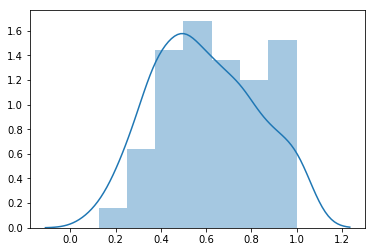

In [49]:
import seaborn as sns
sns.distplot(pmp)
print(np.mean(pmp))

0.71125


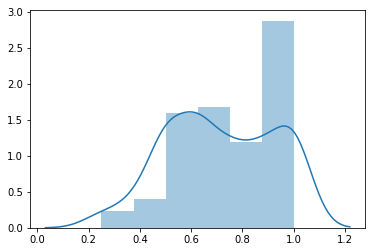

In [51]:
sns.distplot(pomp)
print(np.mean(pomp))

In [46]:
print(np.mean(pma))

0.45875


In [41]:
print(stats.mode(dl))
print(stats.mode(dh))

ModeResult(mode=array([0.]), count=array([117]))
ModeResult(mode=array([0.]), count=array([151]))


In [56]:
print([1,1,1,1,0,0,0,0] * 5)

[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
